# Sprint 8.1
### importo las librerías que necesitaré
### conecto la BD
### creo una función para leer tablas, las leo y las guardo en variables com DataFrame


In [2]:
 
import pandas as pd
import mysql.connector              #librería de python que conecta con mysql utilizando el método connector. Trae info implícita de las relaciones e/tablas
import matplotlib.pyplot as plt
import seaborn as sns

# Conectarse a la base de datos
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='flaflu88',
    database='institute'
)

# Crear una función para leer una tabla usando pandas
def leer_tabla(tabla):
    query = f"SELECT * FROM {tabla}"
    return pd.read_sql(query, con=mydb)

# Leer todas las tablas
df_companies = leer_tabla('companies')
df_credit_cards = leer_tabla('credit_cards')
df_creditcardstatus = leer_tabla('creditcardstatus')
df_products = leer_tabla('products')
df_trans_products = leer_tabla('trans_products')
df_transactions = leer_tabla('transactions')
df_users = leer_tabla('users')

# Cerrar la conexión
mydb.close()

# Mostrar ejemplo de una tabla
#print(df_companies.head())
df_companies
df_transactions

C:\Users\jodri\AppData\Local\Temp\ipykernel_20404\2290822680.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, con=mydb)


,id,card_id,business_id,fecha_hora,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9184589824,-12.5275561984
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9694885888,-117.5251835904
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.222680576,-129.049879552
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593055232,-100.555928064
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381445632,158.298210304
...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.3194717184,-11.4134912
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.012168192,-64.671543808
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.8604531712,-172.3457293312
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.0751433728,-142.2416956416


Recordatorio f'string':
query: Es una variable que contiene la consulta SQL.
f"SELECT * FROM {tabla}": Es una f-string, que permite insertar el valor de una variable dentro de una cadena. Aquí se inserta el valor de la variable tabla dentro de la consulta SQL.
pd.read_sql: Es una función de pandas que ejecuta una consulta SQL y devuelve el resultado como un DataFrame. 
query: Es el argumento que pasa la consulta SQL construida anteriormente.
con=mydb: Aquí, mydb es la conexión a la base de datos. El objeto mydb representa la conexión activa realizada con la librería como mysql.connector.
return: La función devuelve un DataFrame que contiene los datos de la tabla leída desde la base de datos SQL.

### Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.


# Ejercicio 1
## Una variable numérica

**Variable escogida**: importe de las transacciones.

**Objetivo**: conocer la distribución del importe de las transacciones realizadas.

**Visualización escogida**: histograma, ya que quiero representar la distribución de una variable numérica.

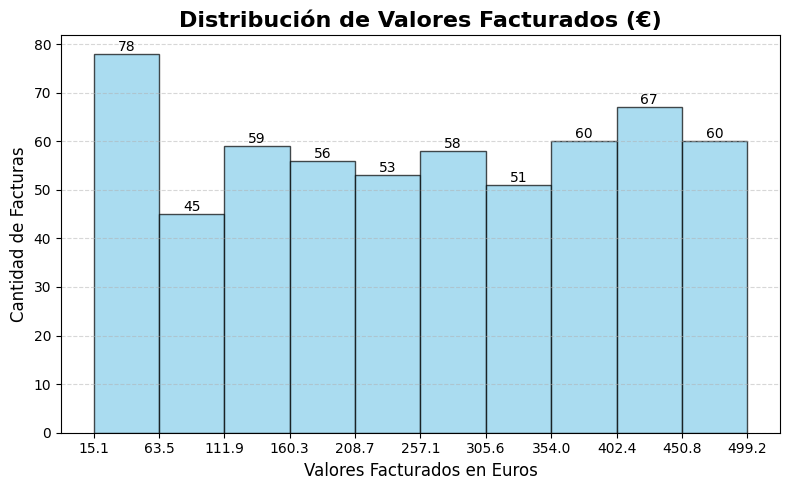

In [70]:
#EX 1 con matplotlib
plt.figure(figsize=(8,5))                                                                           
plt.hist(df_transactions['amount'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)         #creo un histograma de la variable amount de la tabla transactions, defino la
                                                                                                    #   cantidad de barras, su color de fondo y de borde y la transparencia
#values, bins, bars = plt.hist(df_transactions['amount'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)   #opción para capturar los valores intervalos y barras
plt.title('Distribución de Valores Facturados (€)', fontsize=16, fontweight='bold')                       
plt.xlabel('Valores Facturados en Euros', fontsize=12)
plt.ylabel('Cantidad de Facturas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)                                                       #grilla de etiquetas horizontales
plt.bar_label(plt.gca().containers[0])                                                              #etiquetas de barras. plt.gca():"Get Current Axes" (obtener los ejes actuales)
#plt.xticks(bins)                                                                                   #opción para que las etiquetas del eje coincidan con las barras
plt.tight_layout()                                                                                  #ajusta márgenes
plt.show()


**Comentario del resultado**

El histograma representado muestra la distribución del importe de las transacciones realizadas. 

En un análisis general vemos que los importes de las transacciones registradas van de 0 a 500 euros y la frecuencia de estas oscila entre 40 y 80 transacciones.

Concretamente, el primer intervalo, aproximadamente de 15 a 65 euros, tiene la frecuencia más alta, con casi 80 transacciones clasificadas en este rango. El segundo intervalo, aproximandamente de 65-110 euros es el mas bajo con 45 transacciones. Y el anteúltimo intervalo es el segundo mas frecuente con 67 transacciones.

El resto de los rangos tienen entre 50 y 60 registros.

En resumen, los importes de las transacciones realizadas están distribuidos de manera bastante uniforme en todo el rango, con mayor variación para los valores mas bajos. Podríamos interpretar este valor mas bajo como clientes que compran por primera vez para probar el producto.

Aclaración del código comentado: decidimos en este caso descartar de opción para capturar los valores intervalos y barras para usarlos de etiquetas, debido a que por la simplicidad del gráfico pensamos que es mayor complejidad en el código y no aporta interpretación a este gráfico puntual, de hecho al no ser numeros redondos distrae mas. Pero sí lo dejamos en código comentado porque creemos que puede ser de utilidad con otro set de datos.


### Opción B

También lo graficamos por seaborn, de manera mas simple.

La librería sns por default permite una gráfica mucho mas visual, por lo que no hace falta agregar tanto código para mostrar el gráfico.

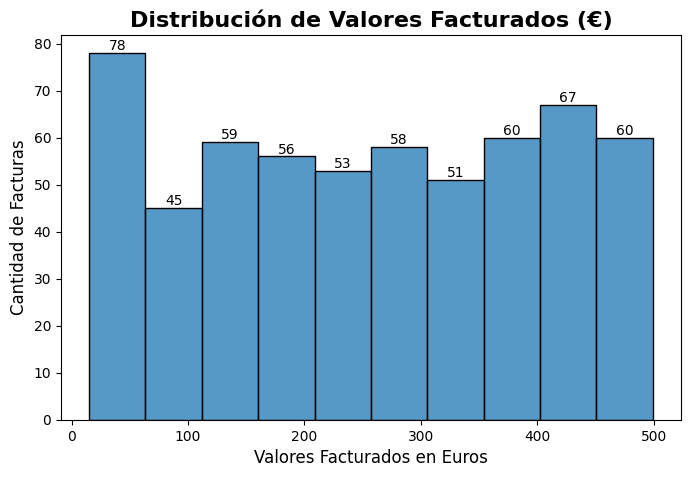

In [71]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_transactions,x='amount',bins=10)
#sns.kdeplot(df_transactions['amount'])
#sns.kdeplot(data=df_transactions, x='amount')
plt.title('Distribución de Valores Facturados (€)', fontsize=16, fontweight='bold')
plt.xlabel('Valores Facturados en Euros', fontsize=12)
plt.ylabel('Cantidad de Facturas', fontsize=12)
plt.bar_label(plt.gca().containers[0])

plt.show()

# Ejercicio 2
## 2 variables numéricas

Convertir las variables en numéricas

Sabemos que las variables que tienen el símbolo $ en realidad no corresponde ya que se trantan de transacciones en euros €, lo corregimos.

In [72]:
df_products['weight'] = df_products['weight'].astype(float)                                  # .astype: menos robusto para cambiar tipo de dato sin reemplazo
df_products['price'] = pd.to_numeric(df_products['price'].str.replace('$', '', regex=False)) # pd.to_numeric(): más robusto, quitando $


Confirmamos que se cambiaron los tipos de dato

In [73]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    object 
 1   product_name  100 non-null    object 
 2   price         100 non-null    float64
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(2), object(4)
memory usage: 4.8+ KB


**Variables escogidas**: de la tabla productos, peso y precio.

**Objetivo**: identificar si existe alguna relación entre el peso y el precio de los productos.

**Visualización escogida**: boxplot, ya que quiero representar la distribución de los precios en relación a lo que pesan los productos, identificando patrones, tendencias y valores atípicos, lo que puede ayudarnos a tomar decisiones.

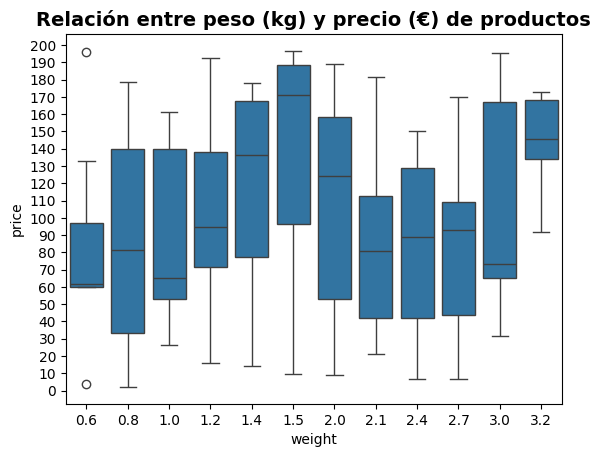

In [74]:
# Crear el boxplot con Seaborn
sns.boxplot(x=df_products["weight"], y=df_products["price"])

plt.title('Relación entre peso (kg) y precio (€) de productos', fontsize=14, fontweight='bold')

# Obtener el valor máximo de la serie y ajustarlo a un múltiplo de 10
max_y = int(df_products["price"].max())  # Convertir a entero

# Establecer etiquetas en el eje Y desde 0 hasta el valor máximo de la serie, de 10 en 10
plt.yticks(range(0, max_y + 10, 10))

# Mostrar el gráfico
plt.show()



**Comentario del resultado**

El Boxplot representado muestra la relación entre las variables peso y precio de los productos.

En un análisis general no identificamos un patrón claro en cuanto al aumento o disminución del los precios en relación a su peso. Mas bien parecen variables independientes.

En un análisis mas específico, podemos apreciar que en el primer intervalo(0.6 de peso), existe una mediana muy cercana al primer cuartil, esto significa que hay una acumulación de valores más bajos y menos valores altos. También observamos outliers tanto de precios bajos como altos. Es el único trammo con autliers, podríamos atribuírlo a que hay productos livianos que pueden tener un gran valor por su tecnología, y otros que son simplemente accesorios.

En el otro extremo, los productos mas pesados, de 3.2 de peso, se encuentran mas concentrados y en un precio relativamente mas alto. Esto podría tener sustento en el costo de la materia prima.

Los productos de pesos intermedios parecen ir aumentando el precio hasta un peso de 1.5 y luego bajan los precios a medida que sube su peso.

En resumen, si bien no encontramos un patrón claro de relación entre el peso y el precio de los productos, podemos infereir que los productos de menor peso suelen ser mas baratos, con acumulación de valores bajos y algunos outliers, y los de mayor peso, que suelen ser los mas caros, con acumulación de precios mas altos. Además los productos que se encunentran en los extremos de peso suelen tener una distribución mas conscentrada que los de precios intermedios.

# Ejercicio 3 
## una varible categórica

**Variable escogida**: país de la tabla compañías.

**Objetivo**: identificar la representatividad de cada país dentro de las compañías existentes.

**Visualización escogida**: diagrama de árbol o de rectángulos, que muestran la superficie que representa cada país respecto del total y de los demás países.

Con la librería squarify

Preparamos la base de datos que deseamos trabajar

In [3]:
# Agrupar por país y contar el número de empresas
companiasPorPais = df_companies.groupby('country')['company_id'].count()

# Convertir la serie a DataFrame y renombrar la columna
companiasPorPais = companiasPorPais.reset_index()  # Resetea el índice para convertir en DataFrame
companiasPorPais.columns = ['country', 'cantidad de compañías']  # Renombrar las columnas
companiasPorPais = companiasPorPais.sort_values(by='cantidad de compañías', ascending=False)
companiasPorPais


,country,cantidad de compañías
12,Sweden,11
8,Netherlands,10
13,United Kingdom,9
7,Italy,9
14,United States,9
5,Germany,8
1,Belgium,8
10,Norway,7
0,Australia,6
9,New Zealand,6


instalamos una librería nueva dado el gráfico que queremos utilizar

In [4]:
!pip install squarify

Graficamos: 
1. Definimos el tamaño de la figura para que no se superpongan las etiquetas
2. Creamos una etiqueta que contenga tanto el país como la cantidad de compañías para tener mas detalle si lo quisiéramos
3. Generamos el gráfico, etiquetas, transparencia y separación entre bloques
4. Quitamos los ejes
5. Agregamos un título, tamaño de fuente y negrita
6. Lo mostramos

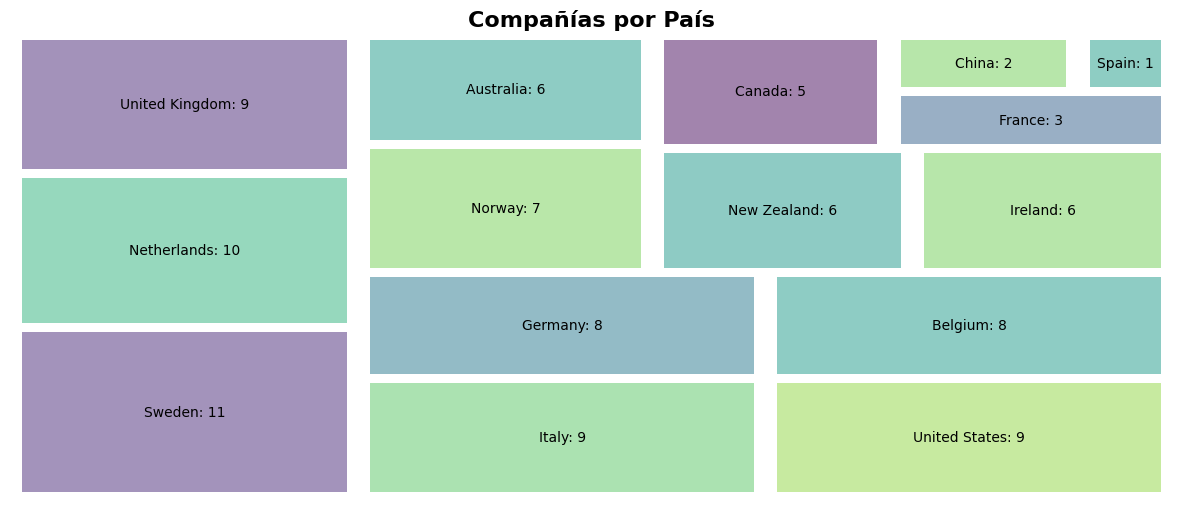

In [5]:
import squarify

plt.figure(figsize=(15, 6))


etiquetas = [f"{row['country']}: {row['cantidad de compañías']}" for _, row in companiasPorPais.iterrows()]

squarify.plot(sizes=companiasPorPais['cantidad de compañías'], label=etiquetas, alpha=.5 , pad=0.5)
plt.axis('off')
plt.title("Compañías por País", fontsize=16, fontweight='bold')
plt.show()


**Comentario del resultado**

El diagrama de árbol o de rectángulos muestra la proporción segun el área que ocupa de cada país respecto de los demás y del total. 

En un análisis general vemos que hay un conjunto de país que poseen mas compañias y un gurpo de países que se ven representados mas pequeños con menos commpañías.

Concretamente, Suecia es el que mas compañías tiene ccon 11 seguido de varios paises con muchas compañias, y luego Francia, China y España son los que menos compañias tienen. Se puede presumir que son mercados nuevos y se irán incorporando compañias en el futuro. Mientras que en los países nordicos de europa parece que ya hay un pull de empresas consolidado.

En resumen, este diagrama nos aporta una vista rápida de las proporciones de representatividad de las compañías de cada país. 

### Opción B

Lo hacemos de manera simple con seaborn, utilizando sólo la variable país

Previamente lo habíamos hecho mucho mas complicado uniendo tablas que luego entendimos que no era necesario porque la relación entre las tablas ya existe 


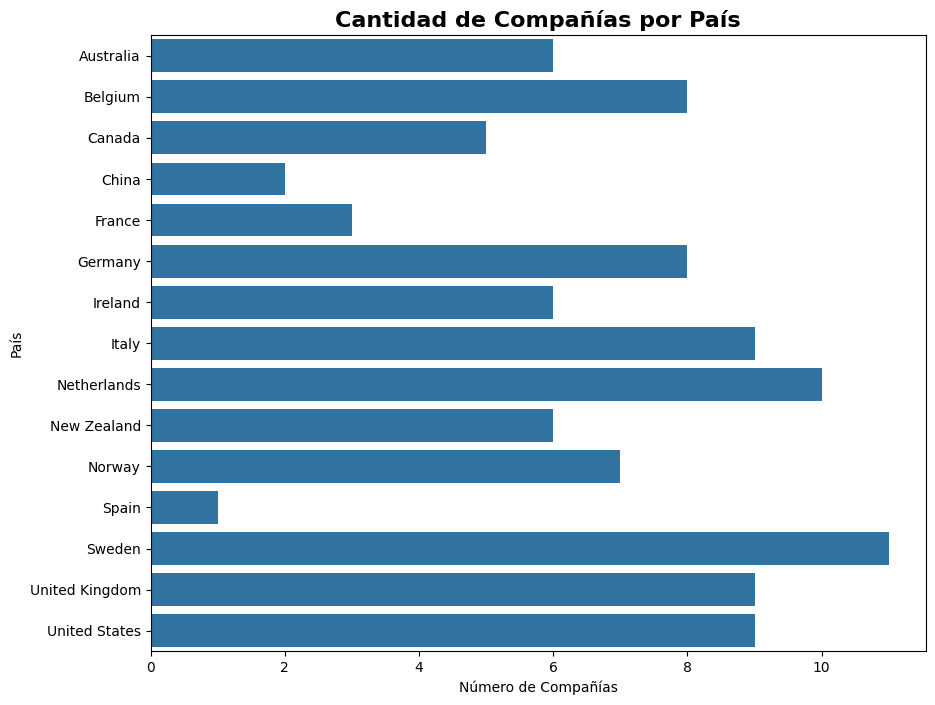

In [7]:
plt.figure(figsize=(10, 8))

sns.countplot(data=df_companies, y='country', order=sorted(df_companies['country'].unique()))  # Cambiamos 'x' por 'y' para invertir los ejes
                                                                                               # Ordenamos por países alfabéticamente
plt.title('Cantidad de Compañías por País', fontsize=16, weight='bold')
plt.xlabel('Número de Compañías')
plt.ylabel('País')

plt.show()

# Ejercicio 4 
## una varible categórica y una numérica 

**Variables escogidas**: amount de la tabla transactions y country de la tabla companies.

**Objetivo**: visualizar el importe total facturada por país. 

**Visualización escogida**: gráfico de barras, ya que nos interesa vusualizar para cada país (variable categórica), la cantidad total facturada (variable numérica).

   business_id   amount
0       b-2222   412.93
1       b-2226   792.63
2       b-2230   700.25
3       b-2234   313.46
4       b-2238   435.34
..         ...      ...
95      b-2602   357.08
96      b-2606    46.25
97      b-2610   406.11
98      b-2614   266.90
99      b-2618  8911.24

[100 rows x 2 columns]
   business_id   amount company_id                 company_name  \
0       b-2222   412.93     b-2222    Ac Fermentum Incorporated   
1       b-2226   792.63     b-2226     Magna A Neque Industries   
2       b-2230   700.25     b-2230                  Fusce Corp.   
3       b-2234   313.46     b-2234    Convallis In Incorporated   
4       b-2238   435.34     b-2238  Ante Iaculis Nec Foundation   
..         ...      ...        ...                          ...   
95      b-2602   357.08     b-2602                 Placerat LLP   
96      b-2606    46.25     b-2606                Sed Est Corp.   
97      b-2610   406.11     b-2610     Egestas Nunc Sed Limited   
98      b-2614   2

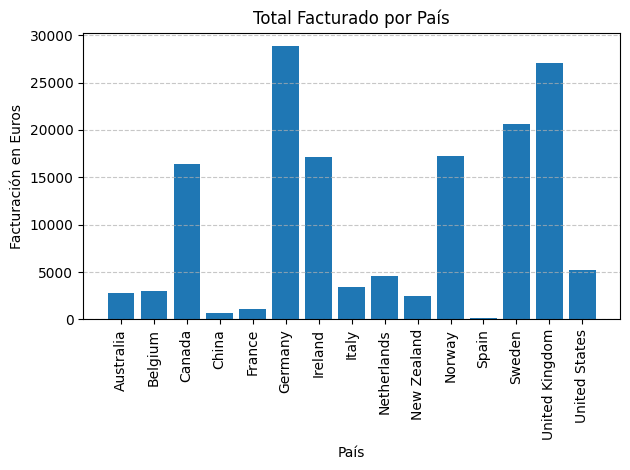

In [3]:

# Agrupamos las transacciones por business_id y sumamos el amount
transacciones_por_empresa = df_transactions.groupby('business_id')['amount'].sum().reset_index()
print(transacciones_por_empresa)

# Unimos el DataFrame de transacciones agrupadas por empresa, con el de companies
df_company_amount = pd.merge(transacciones_por_empresa, df_companies, left_on='business_id', right_on='company_id')
print(df_company_amount)

# Agrupamos por país y sumamos las transacciones
facturacion_por_pais = df_company_amount.groupby('country')['amount'].sum().reset_index()
print(facturacion_por_pais)

# Graficamos usando un gráfico de barras
#plt.figure(figsize=(10, 6))
plt.bar(facturacion_por_pais['country'], facturacion_por_pais['amount'])#, color='lightgreen')
plt.xlabel('País')
plt.ylabel('Facturación en Euros')
plt.title('Total Facturado por País')
plt.xticks(rotation=90)  # Rota las etiquetas del eje X
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Cuadrícula en el eje Y
plt.tight_layout()  # Ajusta el layout
plt.show()


In [4]:
df_company_amount.head(2)

,business_id,amount,company_id,company_name,phone,email,country,website
0,b-2222,412.93,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site
1,b-2226,792.63,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9


**Comentario del resultado**

El gráfico de barras representado muestra la los totales facturados en euros para cada país, de la tabla de compañías.

En un análisis general identificamos que hay un grupo de países que factura mucho mas que otro. Esto nos puede servir para un análisis de negocio ya que se ve un mercado claramete diferenciado según los países de las compañías.

En un análisis mas específico, podemos ver que Alemania y Reino Unido son los países que mas facturan, seguidos por Suecia, Noruega, Irlanda y Canadá, todos por encima de los 15 mil euros. El resto de los países está por debajo de los 5mil euros (con excepción de Estados Unidos que los supera por muy poco), siendo España el que menos factura.

Concluyendo, la facturación se concentra en 6 países básicamente, y los restantes 9 países facturan mucho menos respecto de los primeros. Analizando la madurez en que se encuentran los mercados en cada país podremos tomar decisiones de inversión o desinversión en los mismos.

# Ejercicio 5
## dos varibles categóricas

In [ ]:
df_transactions

**Variables escogidas**: declined de la tabla transactions y country de la tabla companies.

**Objetivo**: visualizar cómo se distribuyen las transacciones aceptadas y rechazadas por cada país. 

**Visualización escogida**: gráfico de barras apiladas, ya que nos interesa vusualizar para cada país (variable categórica), el estado de las transacciones.

In [8]:
declined_por_user = df_transactions.groupby('business_id').agg(
    num_declined=('declined', lambda x: (x == 1).sum()),  # Contar las transacciones declinadas
    num_accepted=('declined', lambda x: (x == 0).sum())  # Contar las transacciones no declinadas
).sort_values(by='num_declined', ascending=False)  # Ordenar por transacciones declinadas
#print(declined_por_user)

companies_declined = pd.merge(declined_por_user, df_companies, left_on='business_id', right_on='company_id')
#print(companies_declined)

# Agrupar por país y sumar las transacciones declinadas y no declinadas
declined_by_country = companies_declined.groupby('country').agg(
    num_declined=('num_declined', 'sum'),         # Sumar las declinadas
    num_accepted=('num_accepted', 'sum')  # Sumar las no declinadas
).reset_index()  # Reiniciar el índice para que 'country' sea una columna regular

# Mostrar el resultado
#print(declined_by_country)

#cálculo de los porcentajes
#declined_by_country['total_trans'] = declined_by_country['num_accepted'] + declined_by_country['num_declined']
#declined_by_country['%_accepted'] = (declined_by_country['num_accepted'] / declined_by_country['total_trans']) * 100
#declined_by_country['%_declined'] = (declined_by_country['num_declined'] / declined_by_country['total_trans']) * 100

#declined_by_country.sort_values(by='%_declined', inplace=True)
print(declined_by_country)


           country  num_declined  num_accepted
0        Australia             6             6
1          Belgium             5             8
2           Canada             4            57
3            China             1             2
4           France             3             3
5          Germany             7           111
6          Ireland             6            56
7            Italy             8             9
8      Netherlands             8            10
9      New Zealand             5             6
10          Norway             7            61
11           Spain             1             1
12          Sweden            11            68
13  United Kingdom             7            93
14   United States             8             9


1. creamos un nuevo DF abrupando las transacciones por id de compañía y si están declinadas o no, creamos 2 nuevas columnas
2. Utlizamos el método groupby junto con agg() para crear múltiples columnas
3. Unimos este DF creado con companies
4. Agrupamos ahora las transacciones por país, otra vez diferenciando las transacciones declinadas y las aceptadas
5. luego hicimos un intento de pasar a porcentajes que luego no utilizamos porque se prefirió mostrar valores absolutos de transacciones
6. finalmente imprimimos para confirmar que tenemos la información que queremos graficar

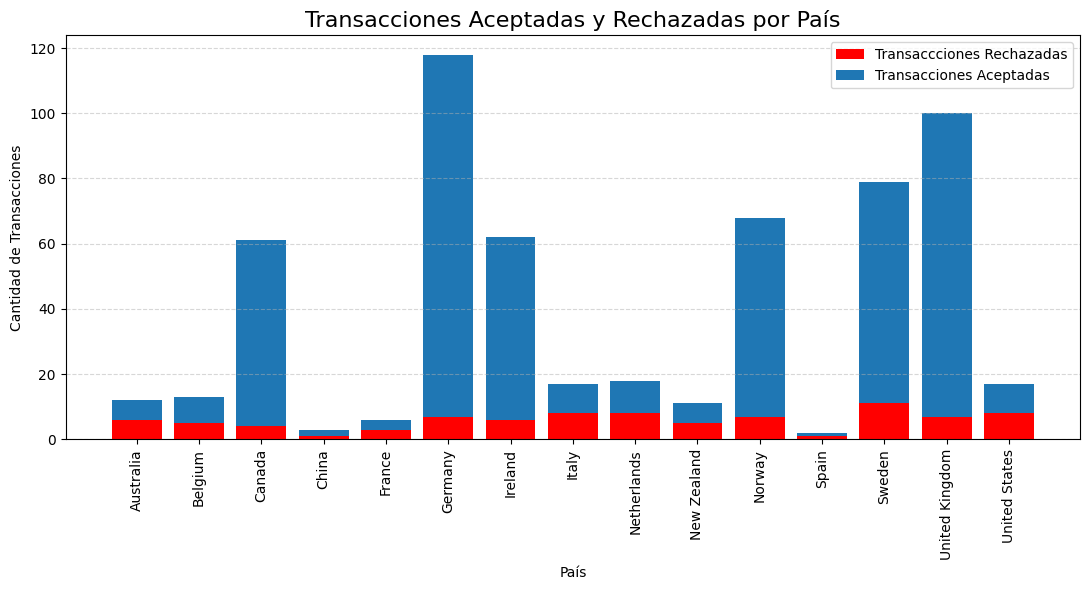

In [9]:
fig,ax = plt.subplots(figsize=(11,6))

bar2 = ax.bar(declined_by_country['country'], declined_by_country['num_declined'],color= 'red', label='Transaccciones Rechazadas')
# Apilar sobre las rechazaas la segunda serie de barras (con bottom)
bar1 = ax.bar(declined_by_country['country'], declined_by_country['num_accepted'], label='Transacciones Aceptadas', bottom=declined_by_country['num_declined'])

ax.legend()
ax.set_xlabel('País')
ax.set_ylabel('Cantidad de Transacciones')
ax.set_title('Transacciones Aceptadas y Rechazadas por País', fontsize=16)

plt.grid(axis='y', linestyle='--', alpha=0.5)                                                       #grilla de etiquetas horizontales
# Agregar etiquetas de valor a cada serie de barras
#plt.bar_label(bar1, label_type='center')  # Etiquetas para transacciones aceptadas en el centro
#plt.bar_label(bar2, label_type='center')  # Etiquetas para transacciones rechazadas

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1. reservarmos el espacio y ejes para la figura
2. criamos un grafico de barras para las transacciones declinadas y luego otro apilado al primero con las transacciones aceptadas
3. agregamos la leyenda que referencie los dos tipos de transacciones
4. habíamos agregado etiquetas de datos pero decidimos comentarlas ya que no buscamos identificar numéricamente las transacciones, sino mas bien los tener una vision mas general
de los valores de ambas variables categóricas.
5. rotamos las etiquetas del eje x para que sea mas legible

**Comentario del resultado**

El gráfico de barras apiladas muestra cómo se distribuyen las transacciones aceptadas y rechazadas por cada país. 

En un análisis general identificamos que existe un número bastante constante de transaccionens declinadas en cada país, independientemente de las transacciones aceptadas. Es decir que los países con mas transacciones a no tienen una mayor cantidad de transacciones declinadas como podría esperarse.

Concluyendo, podríamos conjeturar que la cancelación de transacciones ocurre en una cantidad absoluta en cada país, quizás sean las primeras que no se confeccionan bien, por ejemplo; luego cuando aumentan las transacciones ya no parece que aumenten las transacciones declinadas. 

# Ejercicio 6
## tres varibles

**Variables escogidas**: declined y amount de la tabla transactions, y country de la tabla companies.

**Objetivo**: visualizar cómo se distribuyen las transacciones aceptadas y rechazadas por cada país y por importe facturado. 

**Visualización escogida**: gráfico de bigotes o boxplot, ya que nos permite visualizar la distibución según amount de transactions, por país y según si son declinedo o no. 

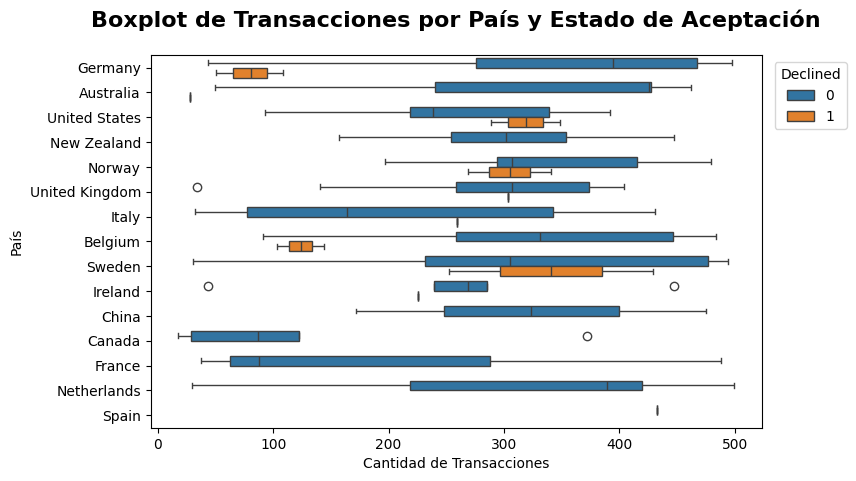

In [2]:
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(data=df_transactions, x='amount', y=df_companies.country, hue='declined')

# Título y etiquetas
plt.title('Boxplot de Transacciones por País y Estado de Aceptación', fontsize=16, weight='bold', pad=20)  #separo el título del gráfico
plt.xlabel('Cantidad de Transacciones')
plt.ylabel('País')

# Personalizar la leyenda
plt.legend(title='Declined', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout(pad=5.0)  # Ajusta el layout para que no se superpongan los elementos
plt.show()


**Comentario del resultado**

El gráfico de bigotes muestra cómo se distribuyen las transacciones aceptadas y rechazadas por cada país. La línea que divide la caja en dos partes representa la mediana de los datos. El extremo de la caja muestra los cuartiles superior e inferior. Las líneas extremas muestran el valor más alto y más bajo, excluyendo los valores atípicos.

En un análisis general podemos apreciar que las transacciones declinadas suelen tener valores mas concentrados que las no declinadas, quizás Suecia sea la excepción.

En específico vemos que Irlanda es uno de los países con menor dispersión de datos, y tiene algunos valores atípicos, altos y bajos. En cuanto a un análisis por países: a Canadá, sus valores de transacciones no declinadas son muy bajos en comparación con otros países, también tienen poca disperción con algún valor atípico alto. Por el contrario, países como Holanda, Italia  o Suesia, tienen una amplia distribución de los valores de sus transacciones no declinadas.

# Ejercicio 7

## Graficar un Pairplot

**Variables escogidas**: Período en meses, amount y declined de la tabla transactions.

**Objetivo**: visualizar la relación entre los meses del año, los importes facturados y si las transacciones fueron declinadas o no.

**Visualización escogida**: Pairplot, como se solicita en el enunciado. Es una grafica de relaciones por pares de columnas numéricas, y soporta un argumento de tono de color(Hue) (para columnas categóricas)

In [ ]:
df_transactions

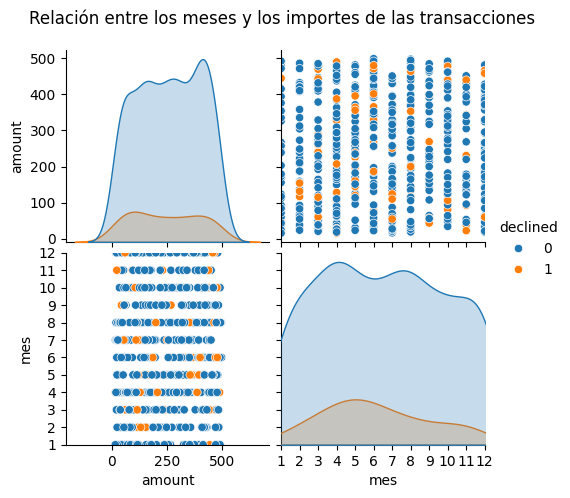

In [10]:
df_transactions['mes'] = df_transactions['fecha_hora'].dt.month
df_transactions

g = sns.pairplot(data=df_transactions, vars=['amount','mes'], hue='declined')
plt.suptitle('Relación entre los meses y los importes de las transacciones')
plt.subplots_adjust(top=0.9)  # Reduce el espacio superior para dar más margen al título
# Establecer ticks personalizados para el eje y (mes)
# Ajustar los ticks del eje y para que muestren los meses correctamente
for ax in g.axes.flatten():
    if ax.get_ylabel() == 'mes':
        ax.set_yticks(range(1, 13))
        ax.set_ylim(1, 12)
    if ax.get_xlabel() == 'mes':
        ax.set_xticks(range(1, 13))
        ax.set_xlim(1, 12)
plt.show()


**Comentario del resultado**

El gráfico de pairplot combina graficos de dispersión e histogramas. El objetivo principal de un gráfico de pares es simplificar las etapas iniciales del análisis de datos al ofrecer una instantánea completa de las posibles relaciones dentro de los datos.

Interpretación del Pairplot (Gráfico de la Diagonal):

Histograma superior izquierdo: Este gráfico muestra la distribución de la variable amount (monto de las transacciones). El eje x representa los valores de amount, y el eje y muestra la densidad o frecuencia. 
Observaciones: Tiene un pico a la derecha, lo que indica que la mayor frecuencia está dada por transacciones que tienen montos altos. Esto podría dar una pauta de cómo se comportan los clientes y puede servir para presupuestar futuros ingresos.

Histograma inferior derecho: Muestra la distribución de la variable mes. Aquí, el eje x corresponde a los meses (numerados del 1 al 12) y el eje y es la densidad, mostrando cómo se distribuyen las transacciones a lo largo de los meses.
Observaciones: Muestra una distribución uniforme a lo largo de los meses. También parece ser un poco más baja al inicio y al final del año, lo que indica que hay menos transacciones en esos períodos en comparación con los meses intermedios. Esto podría ser por razones estacionales o de comportamiento del mercado.

Gráfico de dispersión Superior Derecho (amount vs. mes): El eje x es mes y el eje y es amount.
Las áreas donde se concentran más puntos pueden señalar los meses más activos en términos de valor total de transacciones.
Efecto de las Transacciones Declinadas: Si se observa que en ciertos meses las transacciones declinadas son más frecuentes, esto podría ser un área de análisis adicional para investigar las razones detrás de ello.

Gráfico de dispersión inferior izquierdo (mes vs. amount): El eje x es amount y el eje y es mes.
Aquí podemos observar que hay meses como julio y noviembre sin transacciones de montos altos. Habría que profundizar el análisis para ver si es una cuestión del azar o existe una justificación para ello.




